In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

Generate synthetic data

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = X w + b + noise."""
    X = torch.zeros(size=(num_examples, len(w))).normal_()
    y = torch.matmul(X, w) + b
    y += torch.zeros(size=y.shape).normal_(std=0.01)
    return X, y

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-2.8388,  0.1118]) 
label: tensor(-1.8681)


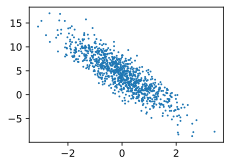

In [5]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In the following code, we define a data_iter function to demonstrate one possible implementation of this functionality. The function takes a batch size, a design matrix, and a vector of labels, yielding minibatches of size batch_size. Each minibatch consists of a tuple of features and labels.


In [6]:
def data_iter(batch_size: int, features: torch.Tensor, labels: torch.Tensor):
    num_examples = len(features)
    indices = list(range(num_examples))
    # Create our minibatch at random
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [7]:
batch_size = 10

In [19]:
# w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
w = torch.zeros(size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):  #@save
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):  #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # For each minibatch
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        l = loss(y_hat, y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean())}')

epoch 1, loss 0.032950568944215775
epoch 2, loss 0.00011133969383081421
epoch 3, loss 4.916347097605467e-05


In [15]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([-0.0004,  0.0002], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.0003], grad_fn=<RsubBackward1>)
